In [59]:
import os 
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.image import imread
import  matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (18,7)
%matplotlib inline
plt.style.use('ggplot')

**a) Download the original dataset (cut it in advance if necessary).**

- You need not less than 5 - 6 classes with not less than 1000 images for each of the classes in the training set,
- not less than 300 images for each of the classes in the validation set, and not less than 60 images for each of the classes in the test set.

**These numbers are approximate and you should follow the distribution ratio given below. Split the dataset into three subsets:**

- training, validation and a test set following the ratio (70% - 20% -10%).
- Use dataset analysis and preprocessing as normalization or standardization etc.
- Represent the classes in training and validation sets in the following two ways shown below for the training set.
- Do the same for the validation set. Do the same for the validation set.

**Make conclusions about the imbalance of the training and validation sets and pick-up the way to fix the imbalance problem of both datasets: training and validation.**

# Training, validation and a test set following the ratio (70% - 20% -10%).

We downloaded the data from Kaggle. The data was a mix of colored and non colored images. We used a script to remove all the non color images and we splitted the data into the required ratios **(70% - 20% -10%).**


All the data was placed in a directory called FacialExpression. The FacialExpression directory contains 3 sub-directories:

- **train** folder contains (the training data)
- **test** folder contains (the testing data)
- **valid** contains (the validation data)

In [54]:
# this is the path to the parent data folder 
FacialExpression='FacialExpression'

# print the sub-derectories
os.listdir(FacialExpression)

['train', 'valid', 'test']

The above list show all the 3 sub-directories. We created path variables to the tain, test and validatoin data.

In [3]:
train_path= FacialExpression+'/train'
test_path = FacialExpression+'/test'
valid_path= FacialExpression+'/valid'

# print the list of diffrent classes
print("Training Classes   : ",os.listdir(train_path))
print("Testing  Classes   : ",os.listdir(test_path))
print("Validation Classes : ",os.listdir(valid_path))

Training Classes   :  ['happy', 'angry', 'surprise', 'disgust', 'neutral', 'sad', 'fear']
Testing  Classes   :  ['happy', 'angry', 'surprise', 'disgust', 'neutral', 'sad', 'fear']
Validation Classes :  ['happy', 'angry', 'surprise', 'disgust', 'neutral', 'sad', 'fear']


We can see from the above results that that all the Training, Testing, Validation data have all the 7 classes.

In [9]:
labels=[]
numbers=[]

for fold in os.listdir(FacialExpression):
    print("_______________________________________________________")
    print("{:25.20}".format(" "),"{:50.50}".format(str(fold)))
    print("=======================================================")
    
    data=[]
    for cls in os.listdir(FacialExpression+"/"+fold):  
        num=len(os.listdir(FacialExpression+'/'+fold+"/"+cls))
        data.append(num)
        labels.append(cls)
        numbers.append(num)
        print(
                    "{:30.30}".format("The number of images for"),
                    "{:15.20}".format(str(cls)),
                    "{:4.30}".format(str(num)),
                )
    print('-------------------------------------------------------')
    print("The number of",fold," images is ",sum(data))

_______________________________________________________
                          train                                             
The number of images for       happy           21377
The number of images for       angry           2572
The number of images for       surprise        4942
The number of images for       disgust         2795
The number of images for       neutral         24419
The number of images for       sad             7393
The number of images for       fear            762 
-------------------------------------------------------
The number of train  images is  64260
_______________________________________________________
                          valid                                             
The number of images for       happy           2720
The number of images for       angry           507 
The number of images for       surprise        720 
The number of images for       disgust         320 
The number of images for       neutral         2928
The number of 

The above output shows the total number images for train, test and validation data, as well as the number of samples per class. 

Text(0.5, 1.0, ' Train, Test and validation ratios')

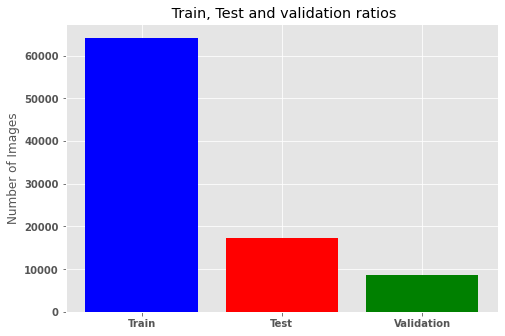

In [60]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar('Train', sum(numbers[0:7]), color = 'b', )
ax.bar("Test", sum(numbers[14:]), color = 'r', )
ax.bar("Validation", sum(numbers[7:14]), color = 'g', )
plt.xlabel("")
plt.ylabel("Number of Images")
plt.title(" Train, Test and validation ratios")


The above bar plot shows the proportions of the train, test and validation data.

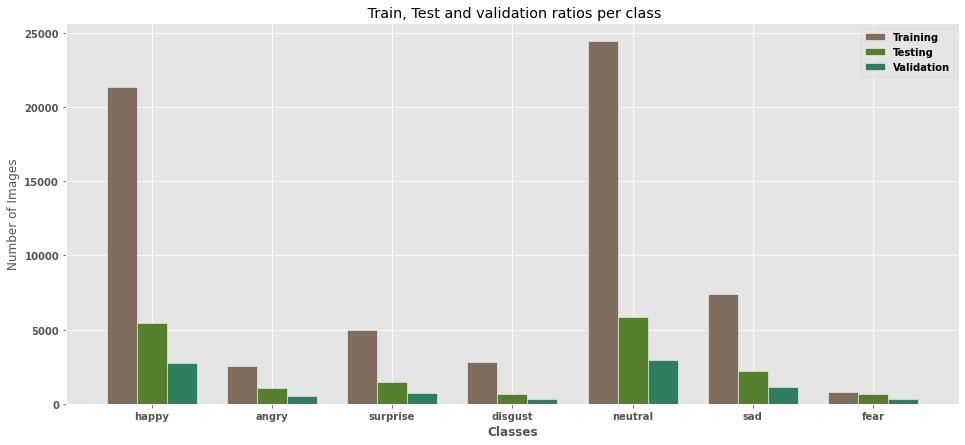

In [65]:
plt.rcParams["figure.figsize"] = (16,7)
barWidth = 0.25
 
# set height of bar
bars1 = numbers[0:7]
bars2 = numbers[14:]
bars3 = numbers[7:14]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Testing')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Validation')
 
# Add xticks on the middle of the group bars
plt.xlabel('Classes', fontweight='bold')
plt.ylabel("Number of Images")
plt.title(" Train, Test and validation ratios per class")
plt.xticks([r + barWidth for r in range(len(bars1))], labels[0:7])
 
# Create legend & Show graphic
plt.legend()
plt.show()


Here we can see the number of training, testing and validation data for everyone one of the seven classes in our data set.

# here we display an image

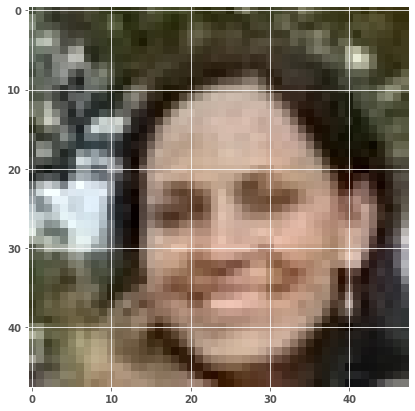

In [82]:
image_shape=imread(train_path+'/happy/'+os.listdir(train_path+'/happy')[1]).shape
plt.imshow(imread(train_path+'/happy/'+os.listdir(train_path+'/happy')[1]))

In [ ]:
Make conclusions about the imbalance of the training and validation sets and pick-up the way to fix the imbalance problem of both datasets: training and validation.

**b) Use Sequential model and build the topology of your CNN implementing unbalanced dataset as well the balanced training and validation datasets.**

- Your CNN topology should include not less than four
**b) Use Sequential model and build the topology of your CNN implementing unbalanced dataset as well the balanced training and validation datasets.**

- Your CNN topology should include not less than four

convolutional layers, where the number of neurons, the number of filters and their size and the type of pooling layers and where to include the last one is up to you.

- **Do experiments with 3 different models** (the difference could be in the choice of **activation function** , **optimizer** , and **number of convolutional layers** , **batch size** or any combination of these, learning rate change, stride etc.).
- Include as a first choice **ReLU** , **Adam** and **batch size 32**.
- Do not forget **batch normalization** and **shuffling.**
- Describe each model.
- Apply **regularization** and **dropout** to the model to prevent overfitting if necessary.
convolutional layers, where the number of neurons, the number of filters and their size and the type of pooling layers and where to include the last one is up to you.

- **Do experiments with 3 different models** (the difference could be in the choice of **activation function** , **optimizer** , and **number of convolutional layers** , **batch size** or any combination of these, learning rate change, stride etc.).
- Include as a first choice **ReLU** , **Adam** and **batch size 32**.
- Do not forget **batch normalization** and **shuffling.**
- Describe each model.
- Apply **regularization** and **dropout** to the model to prevent overfitting if necessary.

# Model 1:  ReLU , Adam and batch size 32

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen =ImageDataGenerator()

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128,activation='relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(7, activation="softmax"))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [117]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

In [118]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [119]:
batch_size = 32

In [120]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               shuffle=True)

Found 64260 images belonging to 7 classes.


In [121]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,shuffle=False)

Found 17356 images belonging to 7 classes.


In [122]:
valid_image_gen = image_gen.flow_from_directory(valid_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,shuffle=True)

Found 8638 images belonging to 7 classes.


In [123]:
valid_image_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             )

Epoch 1/20
2009/2009 [==============================] - 145s 72ms/step - loss: 2.7202 - accuracy: 0.3789 - val_loss: 2.9030 - val_accuracy: 0.3375
Epoch 2/20
1854/2009 [==========================>...] - ETA: 11s - loss: 2.7135 - accuracy: 0.3808

In [111]:
metris=pd.DataFrame(model.history.history)

In [112]:
metris


,loss,accuracy,val_loss,val_accuracy
0,3.004179,0.314052,3.821974,0.127807
1,3.056369,0.302474,3.002180,0.314888
2,2.927825,0.331855,3.002181,0.314888
3,NaN,0.124323,NaN,0.058694


<AxesSubplot:>

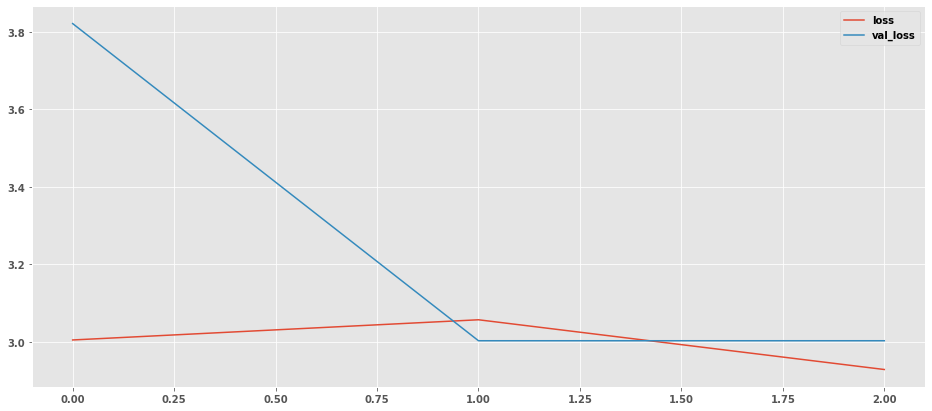

In [114]:
metris[["loss","val_loss"]].plot()

In [109]:
model.save('my_model.h5')

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)